## Effect of parameters on P(k)
---
In this notebook we vary the parameters given in the CCL cosmology and plot the effects this has on the matter power spectrum. 
We will aim to produce one plot in which all parameters, of the $\Lambda CDM$ model, are varied within the range of known priors(presented in Planck and DES papers). Thus, such a plot will contain about 6 to 7 subplots. We will make this selection of subplots for different values of the reddshift(z). Since we have to specify the scalefactor(a), we find the corresponding a through: $a (t) = \frac{1}{1+z}$ such that we get the following, for the values:
- $z = 0 --> a = 1$
- $z = 0.5 --> a = 0.667$
- $z = 1 --> a = 0.5$
- $z = 1.5 --> a = 0.4$
---
The main idea is to develope an intuition for the effect of the $ \Lambda CDM$ parameters on the matter power spectrum. [Ref: CCLX examples - Matter power spectrum](https://github.com/LSSTDESC/CCLX/blob/master/Power%20spectrum%20example.ipynb)

NOTE: For the ranges of the parameters given by the priors, we refer to:
- [Planck](planck-paper link)
- [DES](des-paper link)


In [2]:
# First of all, for good order, import all the necessary packacges, as suggested by the CCLX examples and common sense:
import pyccl as ccl
import numpy as np
import math
import matplotlib.pyplot as plt 

## z = 0, a = 1
Now we define the cosmology for the case of a redshoft of zero (z=0); and vary the parameters within this redshoft bin before plotting them all into a signle plot, using subplots.
In essence we can put all the code into one cell, however: we choose to treat each redshift in itself, this is mainly for overview purposes.
NOTE: we assume a flat universe in all cases; $\Omega_{k} = 0$

Text(0.5, 0, '$k\\quad[Mpc^{-1}]$')

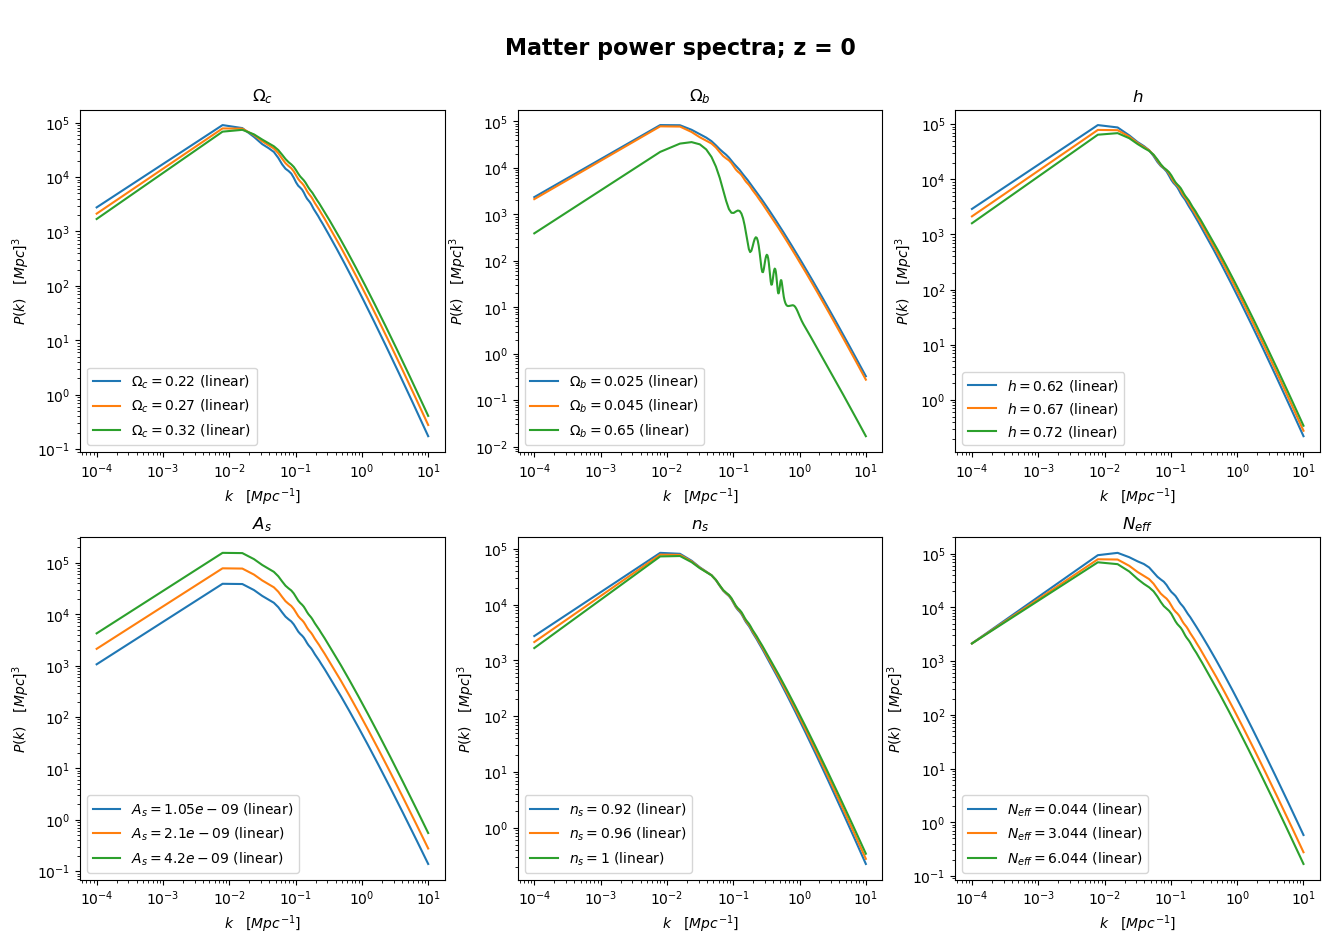

In [72]:
# Considering the found priors, we define the cosmology:
om_c_prior = [0.22, 0.27, 0.32] # these are random; just a trial. The deviations might be too large
om_b_prior = [0.025, 0.045, 0.65]
h_prior = [0.62, 0.67, 0.72]
a_s_prior = [1.05e-9, 2.1e-9, 4.2e-9]
n_s_prior = [0.92, 0.96, 1]
n_eff_prior = [0.044, 3.044, 6.044]

cosmology = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96) # , transfer_function='boltzmann_class') # , transfer_function="eisenstein_hu")

# To plot the spectrum against the wavenumber:
kmin, kmax, nk = 1e-4, 1e1, 1280
k = np.linspace(kmin, kmax, nk) # Try logspace ---> np.geomspace()
a = 1 # scale factor

"""
Feed the parameters into CCL using a dictionary; parameters within a dictionary can be changed too; use built in func cosmo_i.to_dict()
And unpack the dictionary; 
cosmo = ccl.Cosmology(**cosmo_dict)

pars = {"type": "kaas", "leeftijd": 45, "status": "jong"} # this is a dictionary
print(pars)

pars["type"], pars["status"] = "brood", "beschimmeld" # in which we can adjust values
print(pars)

- r strings; avoids SyntaxWarning
- f strings, let you put in variables within {}

Look at allowed nonlin matter power spectra;

"""

# Since we will plot the same power spectrum for some variations, set up a loop function that returns the matter power spectrum in all variations
def loop_comso(list, parameter): # "List" is an expected list of possible parameter values, "parameter": the parameter we want to vary, expected entry the the string naming the parameter
    
    # Define empty arrays in which we will put the resulting powerspectra for a certain variation.
    power_spectra_lin = [] # This is the output list we will plot from, in this array we gather all different 
    #power_spectra_nonlin  = np.zeros(len(list))
    
    # The standard values, in a dictionary:
    pars = {r"Omega_c": 0.27, r"Omega_b": 0.045, r"h": 0.67, r"A_s": 2.1e-9, r"n_s": 0.96} # Here we have a reference list of the parameters. This will be altered slightly in the loop.

    for i in range(len(list)): # For each value of the parameter we want to plot, we calculate a new cosmology and P(k)
        pars[parameter] = list[i]
        
        # Initiate the cosmology with the adjusted parameter, we want to plot the (linear) matter power spectrum from this. 
        cosmo_i = ccl.Cosmology(**pars) # give a dictionary of parameters, which we "unpack" using '**'

        # Calculate the (linear) matter power spectrum and add it to the list we will be returning.
        p_k_lin_i = ccl.linear_matter_power(cosmo_i, k, a)
        power_spectra_lin.append(p_k_lin_i)
        
        # Reset the parameters to their initial value
        pars = {r"Omega_c": 0.27, r"Omega_b": 0.045, r"h": 0.67, r"A_s": 2.1e-9, r"n_s": 0.96}

    return (power_spectra_lin)

#print(loop_comso(om_b_prior, r"Omega_b"))

# Now we generate all the variations:
var_om_c_lin = loop_comso(om_c_prior, r"Omega_c")
var_om_b_lin = loop_comso(om_b_prior, r"Omega_b")
var_h_lin = loop_comso(h_prior, r"h")
var_a_s_lin = loop_comso(a_s_prior, r"A_s")
var_n_s_lin = loop_comso(n_s_prior, r"n_s")
var_n_eff = loop_comso(n_eff_prior, r"Neff")

# Now let us define the matter power spectrum. There is both a linear and nonlinear power spectrum which we define with:
p_k_lin = ccl.linear_matter_power(cosmology, k, a)
p_k_non_lin = ccl.nonlin_matter_power(cosmology, k, a)

# Initiate the plot:
fig, axes = plt.subplots(figsize=(16, 10), nrows=2, ncols=3)
fig.suptitle("\nMatter power spectra; z = 0", weight="bold", fontsize=16)
plt.subplots_adjust(hspace=0.25)
#plt.subplots_adjust(hspace=0.75) # Make the x-axis readable for the long names of certain places of residence

# Plot Omega_c, both the linear and non linear plots
axes[0, 0].loglog(k, var_om_c_lin[0], label=r"$\Omega_c = {}$ (linear)".format(om_c_prior[0]))
axes[0, 0].loglog(k, var_om_c_lin[1], label=r"$\Omega_c = {}$ (linear)".format(om_c_prior[1]))
axes[0, 0].loglog(k, var_om_c_lin[2], label=r"$\Omega_c = {}$ (linear)".format(om_c_prior[2]))
#axes[0, 0].loglog(k, p_k_non_lin, label=r"$\Omega_c = {}$ (non-linear)".format(om_c_prior[0]))
axes[0, 0].set_title(r"$\Omega_c$", weight="bold")
axes[0, 0].legend()
axes[0, 0].set_ylabel(r"$P(k)\quad[Mpc]^3$")
axes[0, 0].set_xlabel(r"$k\quad[Mpc^{-1}]$")
#axes[0, 0].set_yscale('log')
#axes[0, 0].set_xscale('log')

# Plot Omega_b, both the linear and non linear plots
axes[0, 1].loglog(k, var_om_b_lin[0], label=r"$\Omega_{} = {}$ (linear)".format(r"b", om_b_prior[0]))
axes[0, 1].loglog(k, var_om_b_lin[1], label=r"$\Omega_{} = {}$ (linear)".format(r"b", om_b_prior[1]))
axes[0, 1].loglog(k, var_om_b_lin[2], label=r"$\Omega_{} = {}$ (linear)".format(r"b", om_b_prior[2]))
#axes[0, 1].loglog(k, p_k_non_lin, label=r"$\Omega_b = {}$ (non-linear)".format(om_b_prior[0]))
axes[0, 1].set_title(r"$\Omega_b$", weight="bold")
axes[0, 1].legend()
axes[0, 1].set_ylabel(r"$P(k)\quad[Mpc]^3$")
axes[0, 1].set_xlabel(r"$k\quad[Mpc^{-1}]$")

# Plot h, both the linear and non linear plots
axes[0, 2].loglog(k, var_h_lin[0], label=r"$h = {}$ (linear)".format(h_prior[0]))
axes[0, 2].loglog(k, var_h_lin[1], label=r"$h = {}$ (linear)".format(h_prior[1]))
axes[0, 2].loglog(k, var_h_lin[2], label=r"$h = {}$ (linear)".format(h_prior[2]))
#axes[0, 2].loglog(k, p_k_non_lin, label=r"$h = {}$ (non-linear)".format(om_b_prior[0]))
axes[0, 2].set_title(r"$h$", weight="bold")
axes[0, 2].legend()
axes[0, 2].set_ylabel(r"$P(k)\quad[Mpc]^3$")
axes[0, 2].set_xlabel(r"$k\quad[Mpc^{-1}]$")

# Plot A_s, both the linear and non linear plots
axes[1, 0].loglog(k, var_a_s_lin[0], label=r"$A_{} = {}$ (linear)".format(r"s", a_s_prior[0]))
axes[1, 0].loglog(k, var_a_s_lin[1], label=r"$A_{} = {}$ (linear)".format(r"s", a_s_prior[1]))
axes[1, 0].loglog(k, var_a_s_lin[2], label=r"$A_{} = {}$ (linear)".format(r"s", a_s_prior[2]))
#axes[1, 0].loglog(k, p_k_non_lin, label=r"$A_s = {}$ (non-linear)".format(a_s_prior[0]))
axes[1, 0].set_title(r"$A_{s}$", weight="bold")
axes[1, 0].legend()
axes[1, 0].set_ylabel(r"$P(k)\quad[Mpc]^3$")
axes[1, 0].set_xlabel(r"$k\quad[Mpc^{-1}]$")

# Plot n_s, both the linear and non linear plots
axes[1, 1].loglog(k, var_n_s_lin[0], label=r"$n_{} = {}$ (linear)".format(r"s", n_s_prior[0]))
axes[1, 1].loglog(k, var_n_s_lin[1], label=r"$n_{} = {}$ (linear)".format(r"s", n_s_prior[1]))
axes[1, 1].loglog(k, var_n_s_lin[2], label=r"$n_{} = {}$ (linear)".format(r"s", n_s_prior[2]))
#axes[1, 1].loglog(k, p_k_non_lin, label=r"$n_s = {}$ (non-linear)".format(n_s_prior[0]))
axes[1, 1].set_title(r"$n_{s}$", weight="bold")
axes[1, 1].legend()
axes[1, 1].set_ylabel(r"$P(k)\quad[Mpc]^3$") 
axes[1, 1].set_xlabel(r"$k\quad[Mpc^{-1}]$")

# Plot n_eff, both the linear and non linear plots
axes[1, 2].loglog(k, var_n_eff[0], label=r"$N_{} = {}$ (linear)".format("{eff}", n_eff_prior[0]))
axes[1, 2].loglog(k, var_n_eff[1], label=r"$N_{} = {}$ (linear)".format("{eff}", n_eff_prior[1]))
axes[1, 2].loglog(k, var_n_eff[2], label=r"$N_{} = {}$ (linear)".format("{eff}", n_eff_prior[2]))
#axes[1, 2].loglog(k, p_k_non_lin, label=r"$N_{} = {}$ (non-linear)".format("{eff}", n_eff_prior[0]))
axes[1, 2].set_title(r"$N_{eff}$", weight="bold")
axes[1, 2].legend()
axes[1, 2].set_ylabel(r"$P(k)\quad[Mpc]^3$")
axes[1, 2].set_xlabel(r"$k\quad[Mpc^{-1}]$")


In [ ]:
# Code generated by Arthur:

k = np.geomspace(1e-4, 1, 100)

pk_omega_c = []

fig, ax = plt.subplots()  # Explicitly create figure and axis
# Define the color normalization and colormap
norm = mcolors.Normalize(vmin=min(omega_c_array), vmax=max(omega_c_array))
cmap = cm.get_cmap('Reds')
for om in omega_c_array:
    cosmo_dict['Omega_c'] = om
    print(om)
    cosmo_temp = ccl.Cosmology(**cosmo_dict)
    pk = ccl.linear_matter_power(cosmo_temp, k, 1.0)
    pk_omega_c.append(pk)
     # Get color from colormap
    color = cmap(norm(om))
    
    # Get color from colormap
    color = cmap(norm(om))
    
    # Plot each line with its respective color
    ax.loglog(k, pk, color=color, label=f'Om = {om:.2f}')

# Create a ScalarMappable for the colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Needed to avoid errors

# Add colorbar to the figure
cbar = fig.colorbar(sm, ax=ax, label=r'$\Omega_c$')

ax.legend(loc=0, ncols=2)
ax.set_xlabel(r'$k$ [h/Mpc]')
ax.set_ylabel(r'$P(k)$ [Mpc/h]^3')
ax.set_title("Matter Power Spectrum for Different $\Omega_c$")
plt.show()